In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Web Scraping

Please note, this is not a comprehensive tutorial, but rather seeks to showcase the use of web-scraping used by steudents during the tutoring process. This set of notes was constructed with the aid of ChatGPT.

Below are a list of comprehensive web-scraping tutorials for further perusal:
- https://realpython.com/beautiful-soup-web-scraper-python/ 

Another nave for web-scraping is **spidering** as you're essentially crawling the web ;)

Web scraping is the process of automatically extracting data from websites using software or a script. This involves analyzing the structure of the website, identifying the relevant data, and then using specialized tools to extract and store the information in a structured format.

Web scraping is a useful technique for collecting large amounts of data from the internet quickly and efficiently. It can be used for a wide range of applications, including market research, competitive analysis, data analysis, and content aggregation.

However, it is important to note that web scraping can sometimes be illegal or unethical if done without the consent of the website owner or if it violates the website's terms of service. Therefore, it is important to always check the legal and ethical implications of web scraping before proceeding.

In order to check if a website allows scraping, check the `robot.txt` file. This will provide information on if scraping it allowed. 

Important to note, web-scraping is very beneficial, however during the process, it must respect the website, so as not to cause any harm and additionally must respect basic GDPR rules. 

### What is a web-page made of and how does this effect scraping
Every webpage is comrpised of HTML elements, which generate the layout, structure and elements of each web-page. 

To inspect these elements please go onto the site you want to scrape, and enter developer mode. For Mac use `Cmd + Alt + I` and or Windows or Linux use `Ctrl + Shift + I`. 
Take for example the wikipedia page below: 

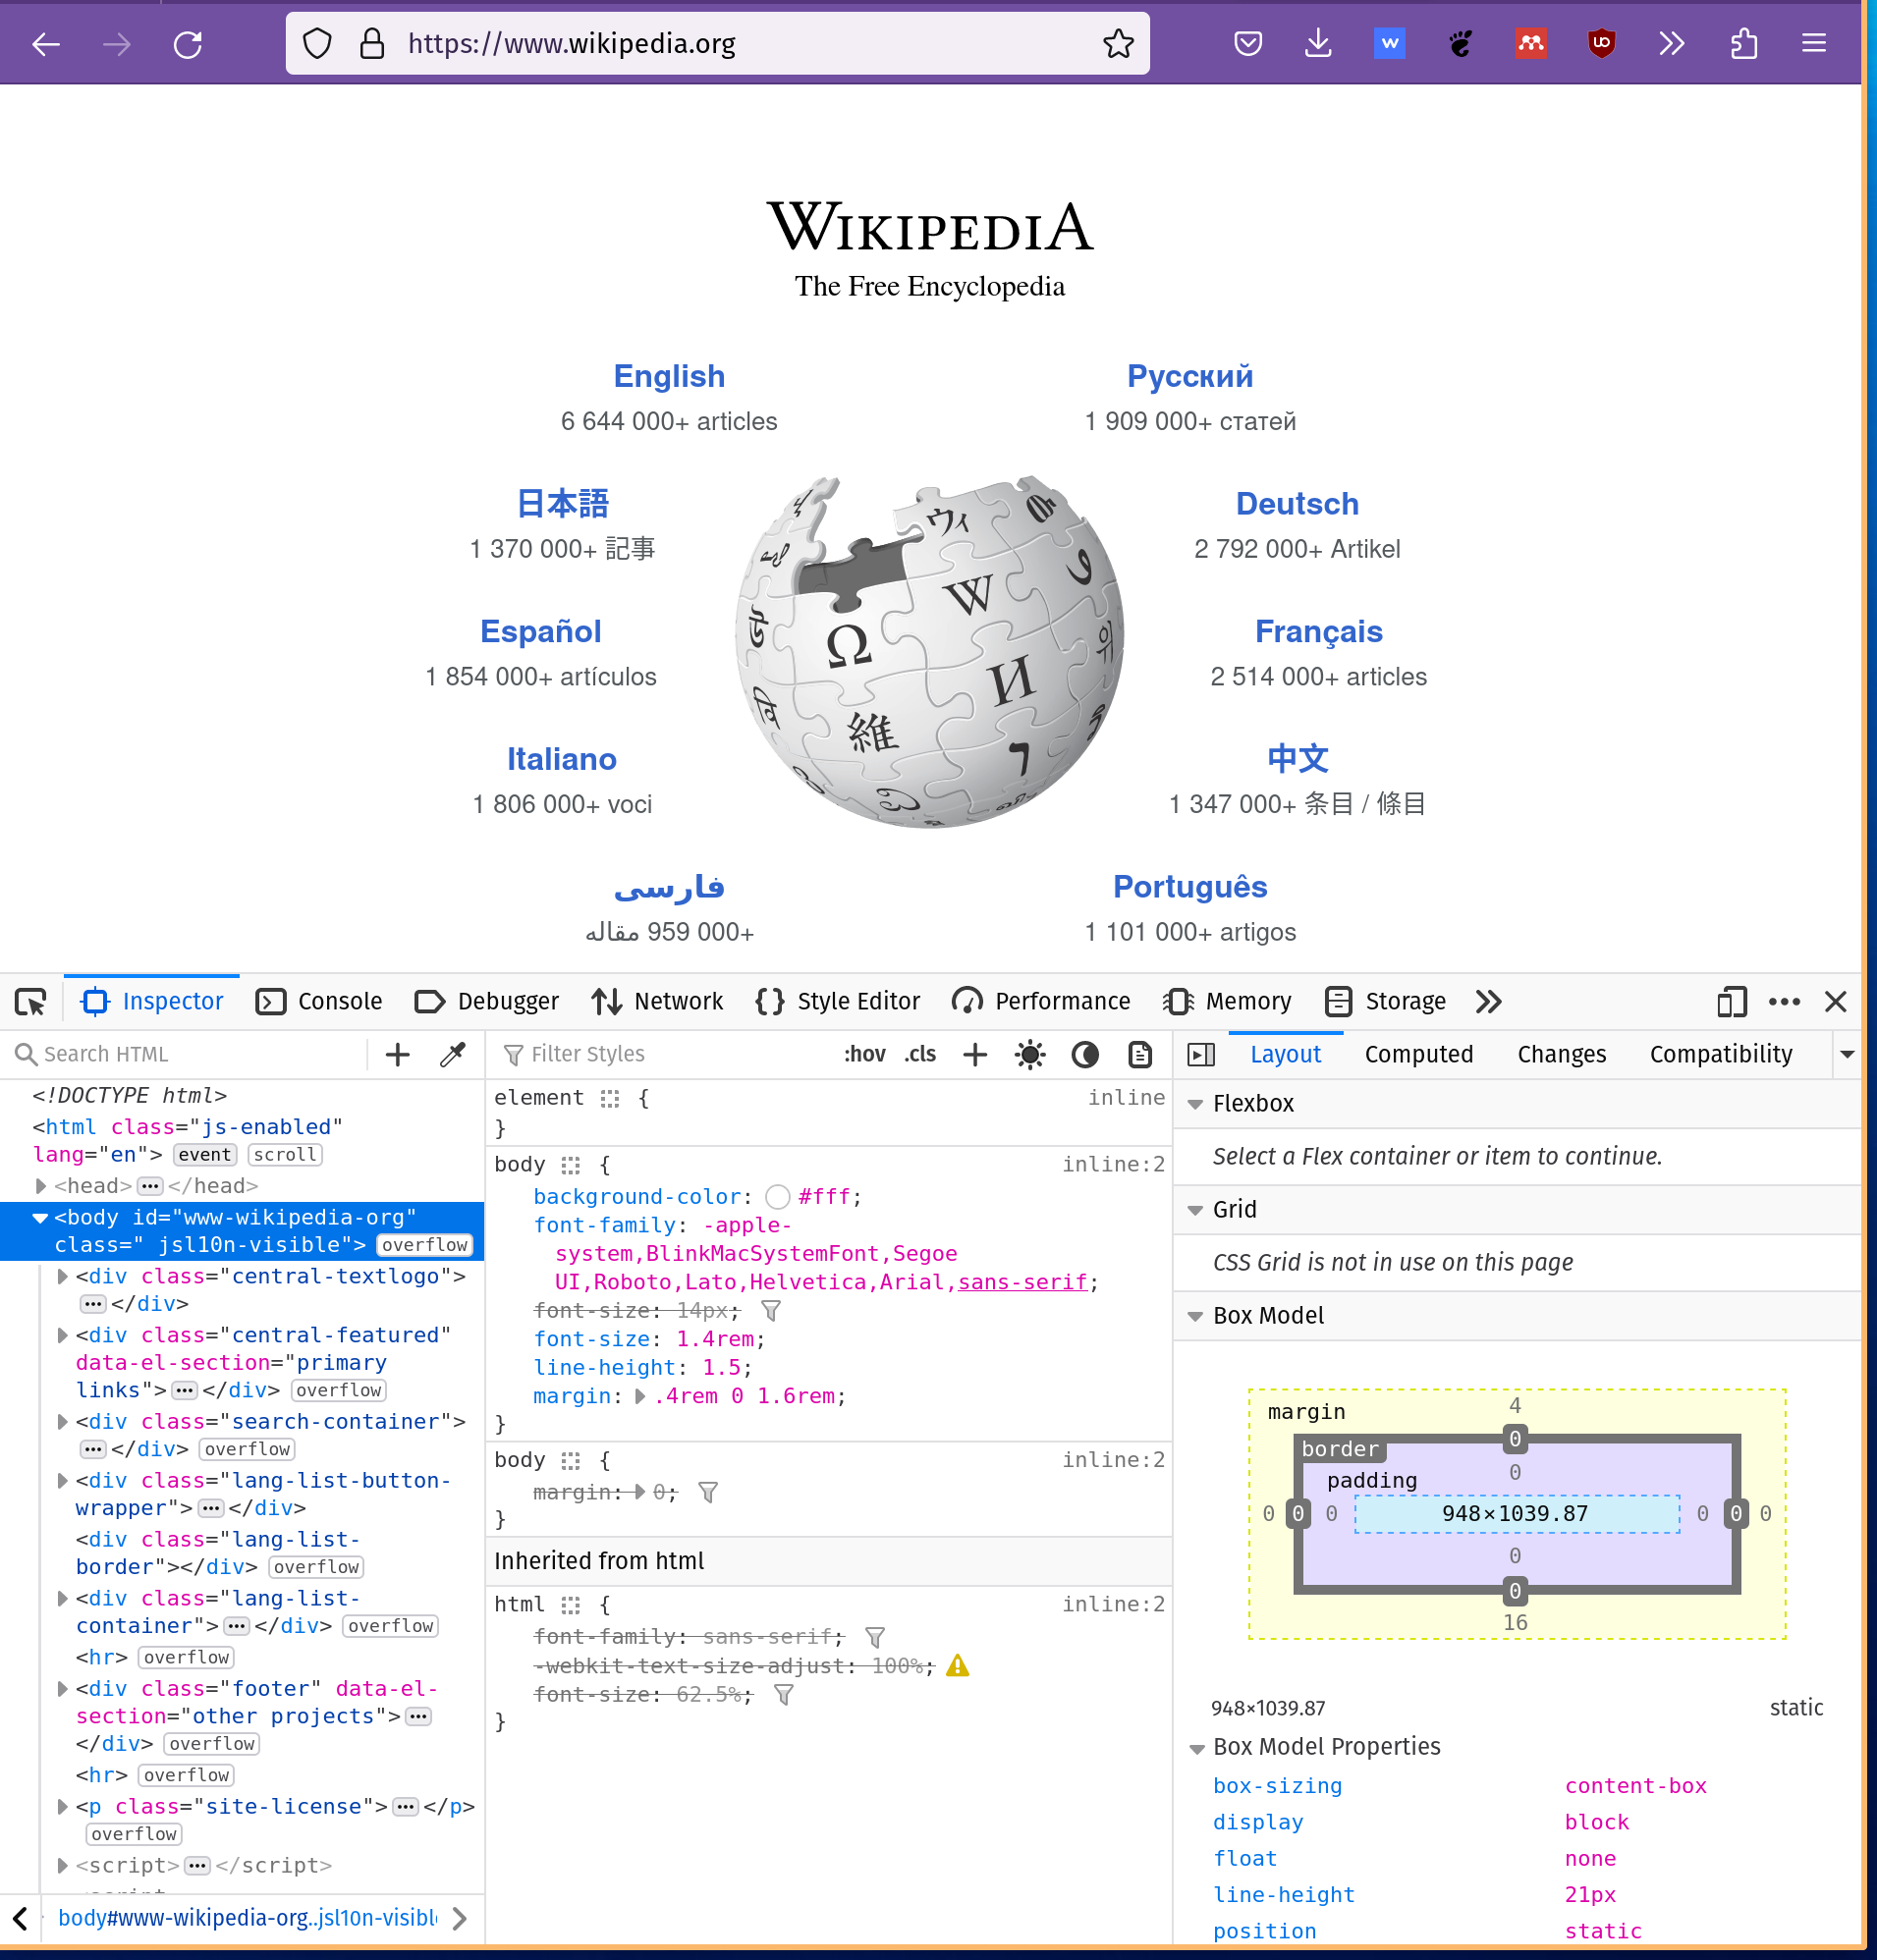

In this mode you can begin to understand in which HTML elements lies the desried information to scrape. 

### Robot.txt

For an example of a Robot.txt file please review Wikipedia's Robot.txt file available here: 
https://en.wikipedia.org/robots.txt . Alternatively the page is displayed below. 

In [7]:
robot_url = "https://en.wikipedia.org/robots.txt"
webpage = requests.get(robot_url)
print(webpage.text)

﻿# robots.txt for http://www.wikipedia.org/ and friends
#
# Please note: There are a lot of pages on this site, and there are
# some misbehaved spiders out there that go _way_ too fast. If you're
# irresponsible, your access to the site may be blocked.
#

# Observed spamming large amounts of https://en.wikipedia.org/?curid=NNNNNN
# and ignoring 429 ratelimit responses, claims to respect robots:
# http://mj12bot.com/
User-agent: MJ12bot
Disallow: /

# advertising-related bots:
User-agent: Mediapartners-Google*
Disallow: /

# Wikipedia work bots:
User-agent: IsraBot
Disallow:

User-agent: Orthogaffe
Disallow:

# Crawlers that are kind enough to obey, but which we'd rather not have
# unless they're feeding search engines.
User-agent: UbiCrawler
Disallow: /

User-agent: DOC
Disallow: /

User-agent: Zao
Disallow: /

# Some bots are known to be trouble, particularly those designed to copy
# entire sites. Please obey robots.txt.
User-agent: sitecheck.internetseer.com
Disallow: /

User-agent: 

### Using BeautifulSoup import the webpage content (HTML) for manipulation

In [33]:
url = "https://en.wikipedia.org/wiki/Data_science"
webpage = requests.get(url)
content = BeautifulSoup(webpage.content, 'html.parser')
print(content)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-featu

### Finding the relevant Information
There are multiple method build within BeautifulSoup that when used on conjunction with information on the webpage's structure allows you to extract information. Take for example, we would like to extract all links within the document for further scraping

In [40]:
links = content.find_all('a', href=True)

In [46]:
for link in links:
    print(link.get('href'))

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Data+science
/w/index.php?title=Special:UserLogin&returnto=Data+science
/w/index.php?title=Special:CreateAccount&returnto=Data+science
/w/index.php?title=Special:UserLogin&returnto=Data+science
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
#
#Foundations
#Relationship_to_statistics
#Etymology
#Early_usage
#Modern_usage
#See_also
#References
https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%